# Part II - Bike Rental Data Analysis
## by Marius F.

## Investigation Overview


The main features of interest are the user_type (Customer or subscriber) and how the usage of the bike rental service differes between those users (e.g. in terms of rental (start) time and travel distance). Understanding the different user behaviors might help in coming up with a marketing campaign and special offers for those users and maybe converting regular customers into long term subscribers. 


## Dataset Overview

The dataset is from Lyft BayWheels (earlier FordGo) - an e-bike sharing company. The data was obtained from the following source: https://www.kaggle.com/datasets/dcshah/bay-wheels-2019-data/data

The data is organized in separate csv files for each month and contains data for all months of 2019. Each row constitutes a bike ride where information about the bike ride has been recorded (e.g. start and end time/location of bike trip, bike ID, destination name, etc.). In total there are 2506983 rows in 15 columns in the initial dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('cleaned_bikeshare_dataset.csv')

In [14]:
# Transform string to proper ordinal and nominal categorical variables
month_cat = np.sort(df['month_start'].unique())
month_cat = pd.api.types.CategoricalDtype(categories=month_cat, ordered=True)
day_cat   = np.sort(df['day_start'].unique())
day_cat   = pd.api.types.CategoricalDtype(categories=day_cat, ordered=True)
hour_cat  = np.sort(df['hour_start'].unique())
hour_cat  = pd.api.types.CategoricalDtype(categories=hour_cat, ordered=True)

df = df.astype({'month_start' : month_cat,
                            'month_end'   : month_cat,
                            'day_start'   : day_cat,
                            'day_end'     : day_cat,
                            'hour_start'  : hour_cat,
                            'hour_end'    : hour_cat})

df['user_type'] = df['user_type'].astype('category')


# Convert to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time']   = pd.to_datetime(df['end_time'])

# Get day of week from numeric value
df['day_of_week_start'] = df['start_time'].dt.day_name()

# Make day of week an ordinal variable
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_cat = pd.api.types.CategoricalDtype(categories=days, ordered=True)
df['day_of_week_start'] = df['day_of_week_start'].astype(day_cat)

## Distribution of Bike Usage By User Type

To get an overview about the different user types and their bike usage, we start by looking at the distribution over user over the day divided in hours.
We can see that both distributions look similar in terms of general shape, i.e. both users types have bimodal distributions with peaks at the start and the end of the working day. What is interesting, however, is that those peaks are much more pronounced for the subscribers while being more flat for customers. This indicates that a larger fraction of the subscribers use the service for commuting from and to work. However, since the peaks for customers are less pronounced this indicates that a larger fraction of customers use the service for intraday activities or for shopping or there are more students - who have a less strict defined schedule - using our service as customers.

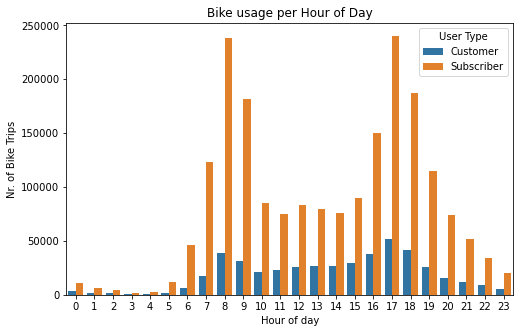

In [21]:
color = sb.color_palette()[0]

plt.figure(figsize=(8,5))
sb.countplot(data=df, x='hour_start', hue='user_type')
plt.title('Bike usage per Hour of Day')
plt.xlabel('Hour of day')
plt.ylabel('Nr. of Bike Trips')
plt.legend(title='User Type');

## Travel Duration per User Type as Function of Time of Day

In the previous slide we have seen that a larger fraction of subscribers uses our service for work commutes while we came up with the assumption that customers either use the service for intraday freetime activities or there are more students, who use the service as customers.
To gain more insights we will now look at the some important statistical metrics (median, IQR) for the travel durations by each user type throughout a day via a box plot.
The graph below clearly shows that there factors which distinguish both user groups. While most of the subscribers seem to travel the same amount of time throughout the whole working day (uniform distribution), the customers' travel time increases towards the middle of the day, i.e. during working hours.
 Especially, between 10:00 and 16:00 the travel durations of customers are almost twice as large as those of subscribers (in terms of median and IQR). <br>
 This could be seen as another indication that customers either mostly consist of students or other people who do not have fixed fixed working hours. Unfortunately, we do not have much data about the individuals apart from travel distance and duration. Hence, my recommendation would be the following:
 1. Collect more information about our customers such as age, gender and job such that we can use these data for more targeted marketing.
 2. Since the data shows strong indications that most of the customers are probably students, I would recommend that we try adertising special offers for students if they convert to subscribers. We could try this for a month or two to see if the assumptions made here are correct while at the same time collecting the proposed additional data.

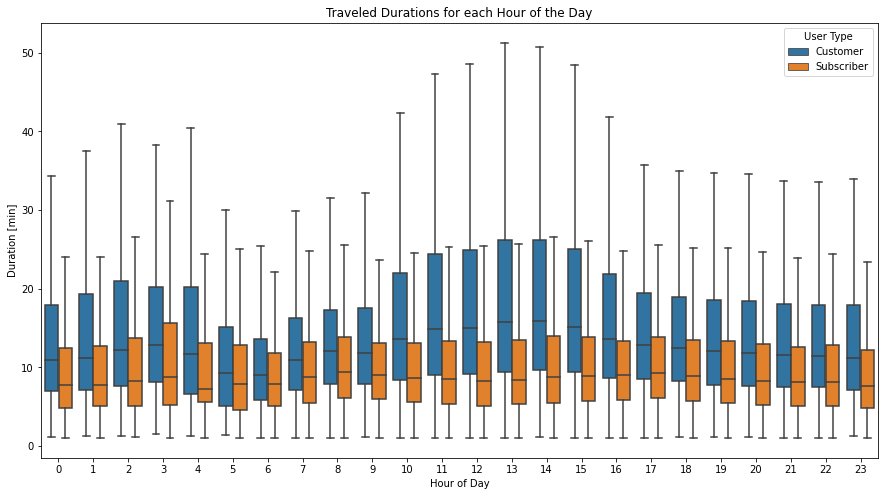

In [22]:
plt.figure(figsize=(15,8))
sb.boxplot(data=df, x='hour_start', y='duration_min', hue='user_type', showfliers=False)
plt.xlabel('Hour of Day')
plt.ylabel('Duration [min]')
plt.title('Traveled Durations for each Hour of the Day')
plt.legend(title='User Type');

## Distribution of Total Bike Rides per Month

Throughout the analysis, I came across a potentially more urgent issue than the conversion of customers to subscribers. To introduce the issue, let uus first look at the distribution of bike rides per month of the year. We can clearly see a down trent towards the end of the year. Concerning the cold weather during winter, this might seem like a natural thing to occur. However, as I am going to show you on the next slide, this conclusion might be a bit flawed and naive.

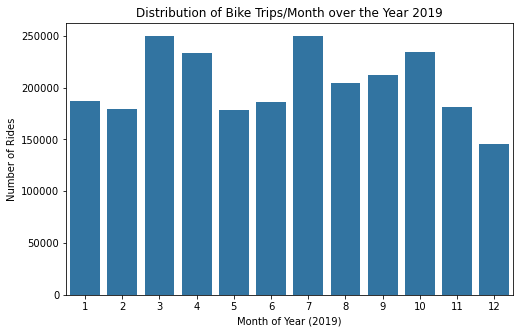

In [18]:
plt.figure(figsize=(8,5))
sb.countplot(data=df, x='month_start', color=color);
plt.ylabel('Number of Rides')
plt.xlabel('Month of Year (2019)')
plt.title('Distribution of Bike Trips/Month over the Year 2019');

## Distribution of Bike Rides per User Type per Month

To visualize the potential problems, we have also invesigated the bike usage number per month for each user type. There are some surprises here concerning the regular customers. Contrary to our expectations the number of regular customers rides increases almost monotonically throughout the year and reaches its maximum at December while the number of subscriber descreases towards the end of the year. We would have expected customers to peak in summer for freetime activities. This might be a hint that during winter time many subscribers ended their subscription and became regular customers due to the fact that they use their bike less often. To investigate this trend more thoroughly would require more data and also inter-year comparisons.
<br>
However, the increase of customers and decrease of subscriber rides during December cannot be explained by the bad weather. To gain further insights on whether this trend is real or an artifcat we did some further investigation shown in the next slide.

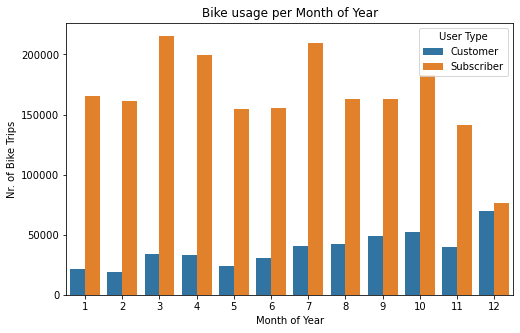

In [23]:
plt.figure(figsize=(8,5))
sb.countplot(data=df, x='month_start', hue='user_type')
plt.title('Bike usage per Month of Year')
plt.xlabel('Month of Year')
plt.ylabel('Nr. of Bike Trips')
plt.legend(title='User Type');

## Median Travel Time and Distance per User Type throughout the Year

To solidify the understanding of the trend observed above, we have plotted the median travel distance and travel duration throughout the year for each user type. These graphs clearly show support of the hypothesis mentioned on the previous slide. 
We already know that customers and subscribers can be differentiated according to travel time and distance. Hence, if our previous assumption about the conversion of subscribers to customers during winter is correct, we should also see a convergence of customer properties towards subscriber properties.
As subscriber rides decrease and customer rides increase during the beginning of winter, the corresponding properties (travel distance and duration) of the customers seem to converge towards the subscribers data. This does strengthen our hypothesis of subscribers converting to customers. A decrease of travel time and duration seems natural but if it was due to the weather in winter we should see the same trend in the subscribers data but these data seem to be invariant under weather changes (time of the year).
<br>
The company should therefore investigate why subscribers use their bike less often during winter and generally make a poll about the overall satisfaction with their service. Financial incentives/rewards for being a subscriber for each full year might also help counteracting the observed trend.

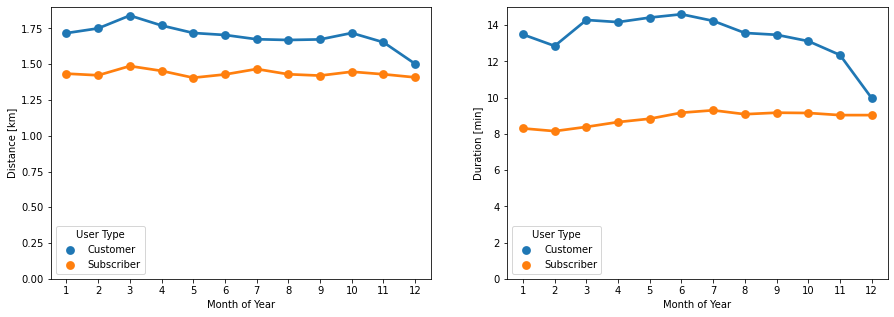

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sb.pointplot(data=df, x='month_start', y='distance_km', hue='user_type', estimator=np.median, ci=None)
plt.xlabel('Month of Year')
plt.ylabel('Distance [km]')
plt.legend(title='User Type')
plt.ylim(0, 1.9);

plt.subplot(1, 2, 2)
sb.pointplot(data=df, x='month_start', y='duration_min', hue='user_type', estimator=np.median, ci=None)
plt.xlabel('Month of Year')
plt.ylabel('Duration [min]')
plt.legend(title='User Type')
plt.ylim(0, 15);